In [1]:
import litmus.models
from litmus import *
import matplotlib.pyplot as plt
import numpy as np
from litmus._utils import dict_extend

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


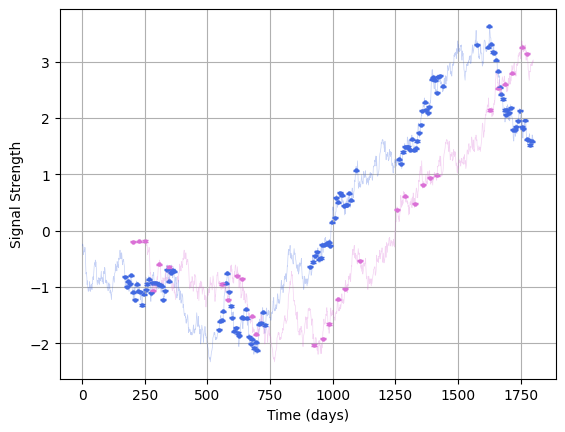

In [2]:
mock = mocks.mock_B
mock.plot()
model_1 = models.GP_simple(verbose=False, debug=False, warn=0)
data = model_1.lc_to_data(mock.lc_1, mock.lc_2)

In [3]:
fitter = litmus.fitting_methods.hessian_scan(model_1, precondition="diag",
                                             verbose=1, debug=False, warn=1,
                                             Nlags=128,
                                             grid_bunching=0.5,
                                             init_samples=10_000,
                                             optimizer_args={"maxiter": 128, "increase_factor": 1.2}
                                             )
fitter.prefit(mock.lc_1, mock.lc_2)

Running final optimization... 
Making Grid with interp scale log 
Prefitting Complete 


In [4]:
fitter.fit(mock.lc_1, mock.lc_2)

Starting Hessian Scan 
Scanning Complete. Calculating laplace integrals... 
Hessian Scan Fitting complete.
-----------------------
-----------------------



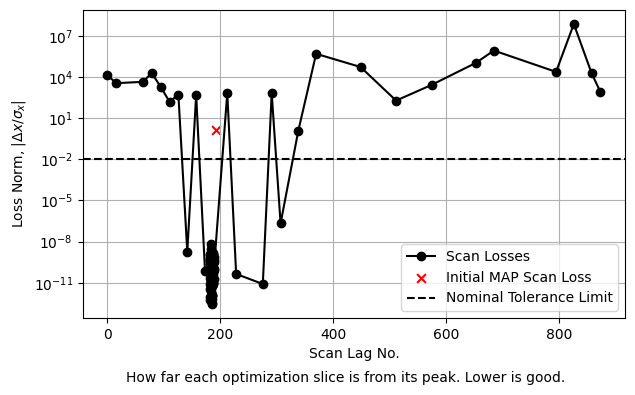

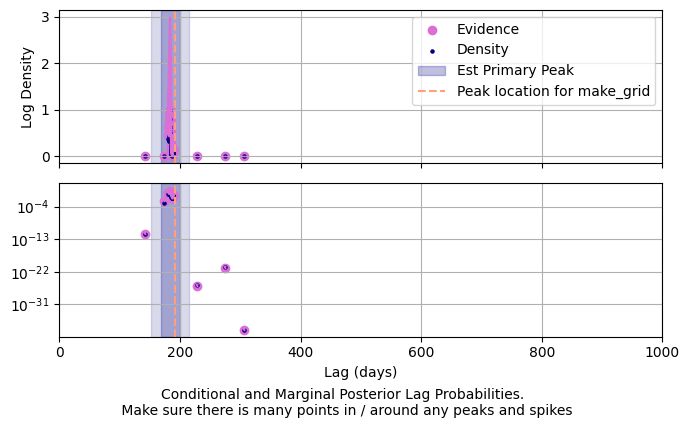

In [5]:
fitter.diagnostics(show=False)
fitter.diagnostic_lagplot(show=False)
plt.show()

Doing re-fitting of 21 lags 
Settled at new tol 1.14e-03 
Settled at new tol 4.43e-04 
Settled at new tol 1.85e-03 
Settled at new tol 7.67e-05 
Settled at new tol 2.73e-03 
Settled at new tol 1.61e-03 
Settled at new tol 1.01e-04 
Settled at new tol 2.72e-04 
Settled at new tol 2.81e-04 
Settled at new tol 8.83e-04 
Settled at new tol 1.48e-03 
Settled at new tol 3.57e-03 
Settled at new tol 7.83e-04 
Settled at new tol 3.21e-04 
Settled at new tol 5.79e-04 
Settled at new tol 7.84e-04 
Settled at new tol 4.96e+01 
Settled at new tol 1.70e+01 
Settled at new tol 2.49e-05 
Settled at new tol 8.35e-05 
Settled at new tol 8.49e-04 
Refitting complete. 


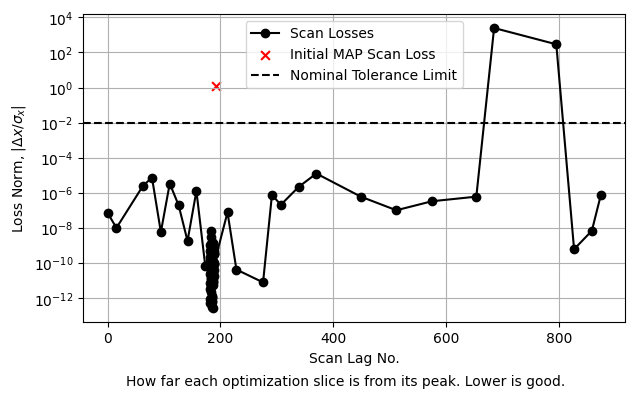

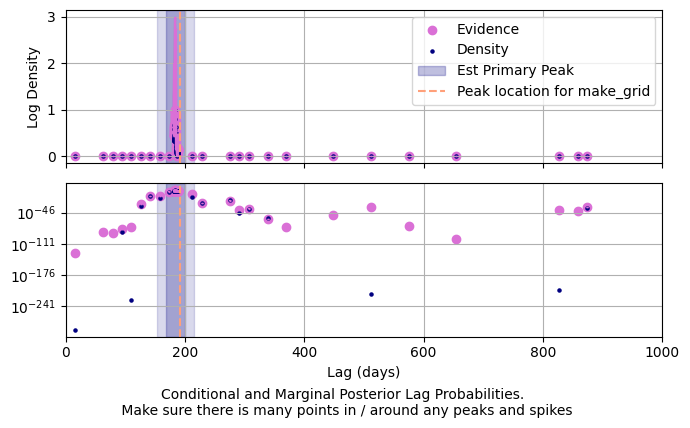

In [6]:
fitter.refit(mock.lc_1, mock.lc_2)
fitter.diagnostics(show=False)
fitter.diagnostic_lagplot(show=False)
plt.show()

Warning! LITMUS object built on pre-run fitting_procedure. May have unexpected behaviour. 

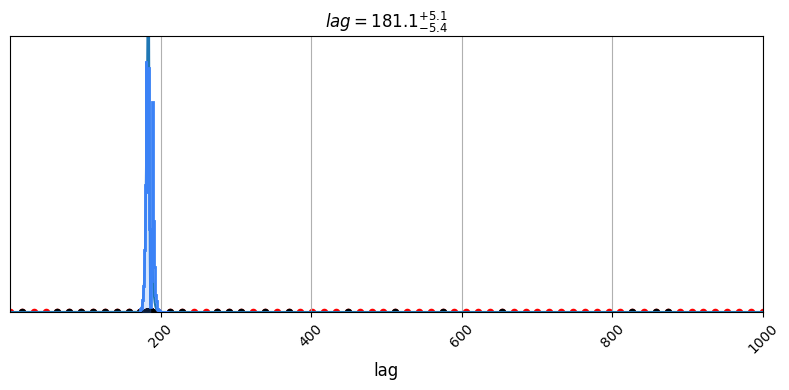

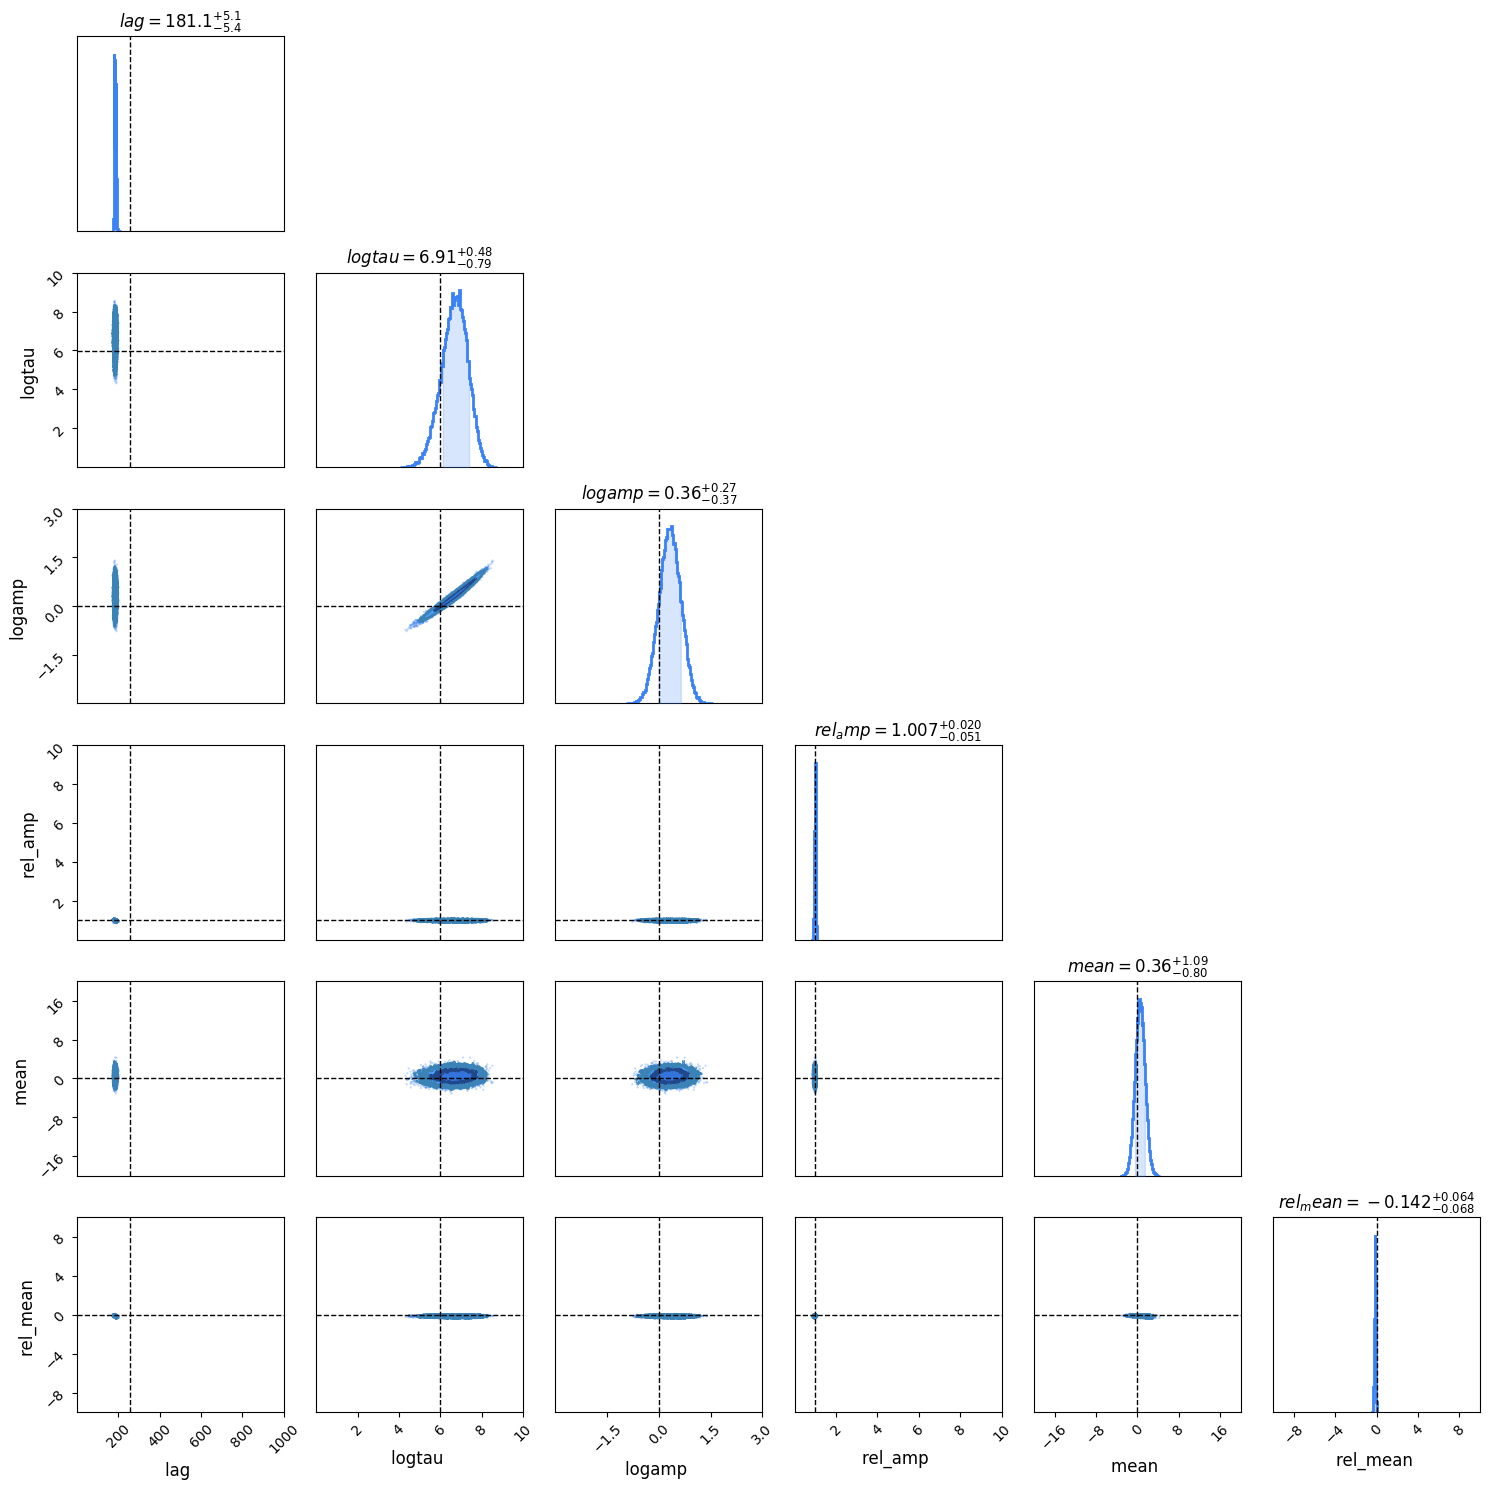

In [7]:
lt = LITMUS(fitter)
lt.lag_plot()
lt.plot_parameters(truth=mock.params(), show=False, prior_extents=True)
plt.show()

In [8]:
fitter_2 = fitting_methods.ICCF(model_1, verbose=5, debug=False, Nboot=1024)
fitter_2.fit(mock.lc_1, mock.lc_2)

Getting Un-Bootstrapped Curve 
Getting Bootstrapped Curves... 


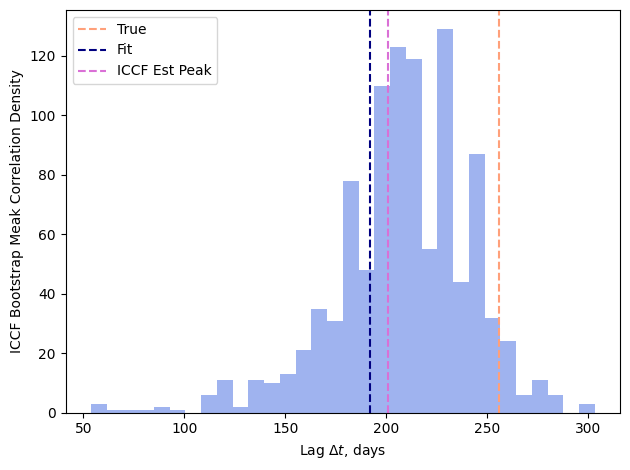

In [9]:
plt.hist(fitter_2.get_samples()["lag"], bins=32, color='royalblue', alpha=0.5)
plt.axvline(mock.lag, ls='--', color='lightsalmon', label="True")
plt.axvline(model_1.find_seed(data)[0]["lag"], ls='--', color='navy', label="Fit")
plt.axvline(fitter_2.get_peaks()["lag"], ls='--', color='orchid', label="ICCF Est Peak")
plt.legend()
plt.xlabel("Lag $\Delta t$, days")
plt.ylabel("ICCF Bootstrap Meak Correlation Density")
plt.tight_layout()
plt.show()

In [10]:
test_lags = fitter_2.get_samples(fitter.Nlags)["lag"]
fitter_3 = litmus.fitting_methods.hessian_scan(model_1, precondition="diag",
                                               verbose=3, debug=False, warn=3,
                                               Nlags=fitter.Nlags,
                                               init_samples=10_000,
                                               optimizer_args={"maxiter": 256, "increase_factor": 1.2},
                                               test_lags=test_lags
                                               )
fitter_3.prefit(mock.lc_1, mock.lc_2)

Using stat model .find_seed to estimate some parameters 
Optimizing Non-Lag Params... 
Beginning scan at constrained-space position: 
	 lag: 	 192.30 
	 logtau: 	 7.26 
	 logamp: 	 0.49 
	 rel_amp: 	 0.96 
	 mean: 	 0.33 
	 rel_mean: 	 -0.26 
Log-Density for this is: 7.92 
Moving non-lag params to new location... 
Optimizer settled at new fit with log density 10.57: 
Optimizer settled at new fit: 
	 lag: 	 192.30 
	 logtau: 	 6.68 
	 logamp: 	 0.32 
	 rel_amp: 	 0.96 
	 mean: 	 0.55 
	 rel_mean: 	 -0.27 
Log-Density for this is: 10.57 
Finding a good lag with grid sweep... 
Grid finds good lag at 192.30: 
Log-Density for this is: 10.57 
Doing lag Optimization in isolation... 
Lag-only opt settled at new lag 192.33... 
Log-Density for this is: 10.80 
Running final optimization... 
Optimizer settled at new fit: 
	 lag: 	 192.33 
	 logtau: 	 6.68 
	 logamp: 	 0.32 
	 rel_amp: 	 0.96 
	 mean: 	 0.55 
	 rel_mean: 	 -0.27 
Log-Density for this is: 10.81 
Estimated to be within ±1.35e+00σ of 

Using stat model .find_seed to estimate some parameters 
Optimizing Non-Lag Params... 
Beginning scan at constrained-space position: 
	 lag: 	 192.33 
	 logtau: 	 6.68 
	 logamp: 	 0.32 
	 rel_amp: 	 0.96 
	 mean: 	 0.55 
	 rel_mean: 	 -0.27 
Log-Density for this is: 10.81 
Moving non-lag params to new location... 
Optimizer settled at new fit with log density 10.82: 
Optimizer settled at new fit: 
	 lag: 	 192.33 
	 logtau: 	 6.68 
	 logamp: 	 0.32 
	 rel_amp: 	 0.96 
	 mean: 	 0.55 
	 rel_mean: 	 -0.27 
Log-Density for this is: 10.82 
Finding a good lag with grid sweep... 
Grid finds good lag at 192.33: 
Log-Density for this is: 10.82 
Doing lag Optimization in isolation... 
Lag-only opt settled at new lag 192.33... 
Log-Density for this is: 10.82 
Running final optimization... 
Optimizer settled at new fit: 
	 lag: 	 192.33 
	 logtau: 	 6.68 
	 logamp: 	 0.32 
	 rel_amp: 	 0.96 
	 mean: 	 0.55 
	 rel_mean: 	 -0.27 
Log-Density for this is: 10.82 
Estimated to be within ±1.91e-02σ of

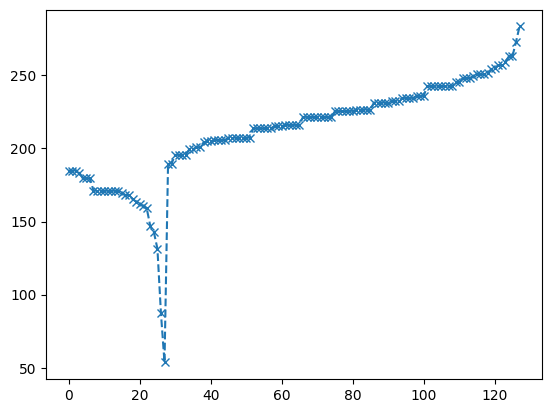

In [11]:
fitter_3.seed_params = fitter_3.estmap_params
fitter_3.prefit(mock.lc_1, mock.lc_2)
plt.plot(fitter_3.lags, 'x--')

Starting Hessian Scan 
:::::::::::::::::::::::
Scanning at lag=184.86 ...

Change of 6.14 against 100.00 
Seems to have converged at iteration 0 / 128 with tolerance 4.15e-05 
:::::::::::::::::::::::
Scanning at lag=184.86 ...

Change of 0.00 against 100.00 
Seems to have converged at iteration 1 / 128 with tolerance 7.39e-06 
:::::::::::::::::::::::
Scanning at lag=184.86 ...

Change of 0.00 against 100.00 
Seems to have converged at iteration 2 / 128 with tolerance 3.10e-07 
:::::::::::::::::::::::
Scanning at lag=183.42 ...

Change of 0.30 against 100.00 
Seems to have converged at iteration 3 / 128 with tolerance 9.87e-06 
:::::::::::::::::::::::
Scanning at lag=179.44 ...

Change of 0.41 against 100.00 
Seems to have converged at iteration 4 / 128 with tolerance 8.89e-07 
:::::::::::::::::::::::
Scanning at lag=179.44 ...

Change of -0.00 against 100.00 
Seems to have converged at iteration 5 / 128 with tolerance 1.77e-08 
:::::::::::::::::::::::
Scanning at lag=179.44 ...

Change

Something wrong in evidence calc on slice 15, discarding: Seems to have severely diverged at iteration 15 / 128 

Change of 0.05 against 100.00 
Seems to have converged at iteration 16 / 128 with tolerance 3.72e+00 
Possibly stuck in a furrow. Resetting start params 
:::::::::::::::::::::::
Scanning at lag=168.05 ...

Change of -0.14 against 100.00 


Eval:	True 
Hessian / Tol:	True 
Evidence Calc:	False 
:::::::::::::::::::::::
Scanning at lag=165.27 ...

Change of 8.66 against 100.00 
Seems to have converged at iteration 18 / 128 with tolerance 4.04e-05 
:::::::::::::::::::::::
Scanning at lag=163.67 ...



Something wrong in evidence calc on slice 17, discarding: Seems to have severely diverged at iteration 17 / 128 

Change of 94.03 against 100.00 
Seems to have converged at iteration 19 / 128 with tolerance 6.24e-05 
:::::::::::::::::::::::
Scanning at lag=162.21 ...

Change of -0.00 against 100.00 


Eval:	True 
Hessian / Tol:	True 
Evidence Calc:	False 
:::::::::::::::::::::::
Scanning at lag=160.65 ...



Something wrong in evidence calc on slice 20, discarding: Seems to have severely diverged at iteration 20 / 128 

Change of 0.12 against 100.00 


Eval:	True 
Hessian / Tol:	True 
Evidence Calc:	False 
:::::::::::::::::::::::
Scanning at lag=158.93 ...



Something wrong in evidence calc on slice 21, discarding: Seems to have severely diverged at iteration 21 / 128 

Change of 66.82 against 100.00 
Seems to have converged at iteration 22 / 128 with tolerance 1.98e-05 
:::::::::::::::::::::::
Scanning at lag=146.83 ...

Change of 4.08 against 100.00 
Seems to have converged at iteration 23 / 128 with tolerance 1.65e-05 
:::::::::::::::::::::::
Scanning at lag=142.78 ...

Change of 5.12 against 100.00 
Seems to have converged at iteration 24 / 128 with tolerance 3.29e-06 
:::::::::::::::::::::::
Scanning at lag=131.47 ...

Change of 4.55 against 100.00 
Seems to have converged at iteration 25 / 128 with tolerance 2.56e-05 
:::::::::::::::::::::::
Scanning at lag=87.15 ...

Change of 440.59 against 100.00 
Seems to have converged at iteration 26 / 128 with tolerance 3.20e-06 
:::::::::::::::::::::::
Scanning at lag=53.65 ...

Change of 10.83 against 100.00 
Seems to have converged at iteration 27 / 128 with tolerance 3.80e-06 
:::::::::::::::::::::::
Scanning at lag=189.65 ...

Change of 7.95 against 100.00 
Seems to have converged at iteration 28 / 1

Something wrong in evidence calc on slice 30, discarding: Seems to have severely diverged at iteration 30 / 128 

Change of -0.00 against 100.00 


Eval:	True 
Hessian / Tol:	True 
Evidence Calc:	False 
:::::::::::::::::::::::
Scanning at lag=195.55 ...

Change of 3.99 against 100.00 
Seems to have converged at iteration 32 / 128 with tolerance 3.16e-05 
:::::::::::::::::::::::
Scanning at lag=195.55 ...

Change of -0.00 against 100.00 
Seems to have converged at iteration 33 / 128 with tolerance 1.47e-06 
:::::::::::::::::::::::
Scanning at lag=199.42 ...



Something wrong in evidence calc on slice 31, discarding: Seems to have severely diverged at iteration 31 / 128 

Change of 2.28 against 100.00 
Seems to have converged at iteration 34 / 128 with tolerance 1.28e-05 
:::::::::::::::::::::::
Scanning at lag=199.42 ...

Change of 0.00 against 100.00 
Seems to have converged at iteration 35 / 128 with tolerance 1.58e-07 
:::::::::::::::::::::::
Scanning at lag=200.74 ...

Change of 5.83 against 100.00 
Seems to have converged at iteration 36 / 128 with tolerance 4.84e-06 
:::::::::::::::::::::::
Scanning at lag=200.74 ...

Change of -0.00 against 100.00 
Seems to have converged at iteration 37 / 128 with tolerance 9.02e-07 
:::::::::::::::::::::::
Scanning at lag=204.05 ...

Change of 15.07 against 100.00 
Seems to have converged at iteration 38 / 128 with tolerance 4.28e-06 
:::::::::::::::::::::::
Scanning at lag=204.76 ...

Change of 3.54 against 100.00 
Seems to have converged at iteration 39 / 128 with tolerance 2.20e-06 
:::::::::::::::::::::::
Scanning at lag=204.76 ...

Change of 0.00 against 100.00 
Seems to have converged at iteration 40 / 1

Something wrong in evidence calc on slice 66, discarding: Seems to have severely diverged at iteration 66 / 128 

Change of 26.98 against 100.00 
Seems to have converged at iteration 67 / 128 with tolerance 1.29e-06 
:::::::::::::::::::::::
Scanning at lag=221.44 ...

Change of 0.00 against 100.00 
Seems to have converged at iteration 68 / 128 with tolerance 4.56e-08 
:::::::::::::::::::::::
Scanning at lag=221.44 ...

Change of 0.00 against 100.00 
Seems to have converged at iteration 69 / 128 with tolerance 4.55e-08 
:::::::::::::::::::::::
Scanning at lag=221.44 ...

Change of 0.00 against 100.00 
Seems to have converged at iteration 70 / 128 with tolerance 4.55e-08 
:::::::::::::::::::::::
Scanning at lag=221.44 ...

Change of 0.00 against 100.00 
Seems to have converged at iteration 71 / 128 with tolerance 4.51e-08 
:::::::::::::::::::::::
Scanning at lag=221.44 ...

Change of 0.00 against 100.00 
Seems to have converged at iteration 72 / 128 with tolerance 4.51e-08 
:::::::::::::::::::::::
Scanning at lag=221.44 ...

Change of -0.00 against 100.00 
Seems to have converged at iteration 73 / 1

Something wrong in evidence calc on slice 75, discarding: Seems to have severely diverged at iteration 75 / 128 

Change of -0.00 against 100.00 


Eval:	True 
Hessian / Tol:	True 
Evidence Calc:	False 
:::::::::::::::::::::::
Scanning at lag=225.36 ...

Change of 9.80 against 100.00 
Seems to have converged at iteration 77 / 128 with tolerance 6.05e-06 
:::::::::::::::::::::::
Scanning at lag=225.36 ...

Change of -0.00 against 100.00 
Seems to have converged at iteration 78 / 128 with tolerance 1.48e-06 
:::::::::::::::::::::::
Scanning at lag=225.36 ...

Change of -0.00 against 100.00 
Seems to have converged at iteration 79 / 128 with tolerance 1.11e-07 
:::::::::::::::::::::::
Scanning at lag=225.85 ...



Something wrong in evidence calc on slice 76, discarding: Seems to have severely diverged at iteration 76 / 128 

Change of -0.21 against 100.00 


Eval:	True 
Hessian / Tol:	True 
Evidence Calc:	False 
:::::::::::::::::::::::
Scanning at lag=226.06 ...



Something wrong in evidence calc on slice 80, discarding: Seems to have severely diverged at iteration 80 / 128 

Change of 15.13 against 100.00 
Seems to have converged at iteration 81 / 128 with tolerance 2.48e-04 
:::::::::::::::::::::::
Scanning at lag=226.56 ...

Change of 12.67 against 100.00 
Seems to have converged at iteration 82 / 128 with tolerance 7.50e-07 
:::::::::::::::::::::::
Scanning at lag=226.56 ...

Change of 0.00 against 100.00 
Seems to have converged at iteration 83 / 128 with tolerance 1.07e-07 
:::::::::::::::::::::::
Scanning at lag=226.56 ...

Change of -0.00 against 100.00 
Seems to have converged at iteration 84 / 128 with tolerance 3.42e-08 
:::::::::::::::::::::::
Scanning at lag=226.56 ...

Change of -0.00 against 100.00 
Seems to have converged at iteration 85 / 128 with tolerance 7.94e-09 
:::::::::::::::::::::::
Scanning at lag=231.34 ...

Change of 89.00 against 100.00 
Seems to have converged at iteration 86 / 128 with tolerance 4.58e-06 
:::::::::::::::::::::::
Scanning at lag=231.34 ...

Change of -0.00 against 100.00 
Seems to have converged at iteration 87

Something wrong in evidence calc on slice 98, discarding: Seems to have severely diverged at iteration 98 / 128 

Change of 41.13 against 100.00 
Seems to have converged at iteration 101 / 128 with tolerance 8.49e-06 
:::::::::::::::::::::::
Scanning at lag=242.46 ...

Change of 0.00 against 100.00 
Seems to have converged at iteration 102 / 128 with tolerance 1.60e-07 
:::::::::::::::::::::::
Scanning at lag=242.46 ...

Change of -0.00 against 100.00 
Seems to have converged at iteration 103 / 128 with tolerance 6.83e-09 
:::::::::::::::::::::::
Scanning at lag=242.46 ...

Change of -0.00 against 100.00 
Seems to have converged at iteration 104 / 128 with tolerance 5.08e-09 
:::::::::::::::::::::::
Scanning at lag=242.46 ...

Change of -0.00 against 100.00 
Seems to have converged at iteration 105 / 128 with tolerance 5.08e-09 
:::::::::::::::::::::::
Scanning at lag=242.46 ...

Change of 0.00 against 100.00 
Seems to have converged at iteration 106 / 128 with tolerance 5.08e-09 
:::::::::::::::::::::::
Scanning at lag=242.46 ...

Change of -0.00 against 100.00 
Seems to have converged at iterati

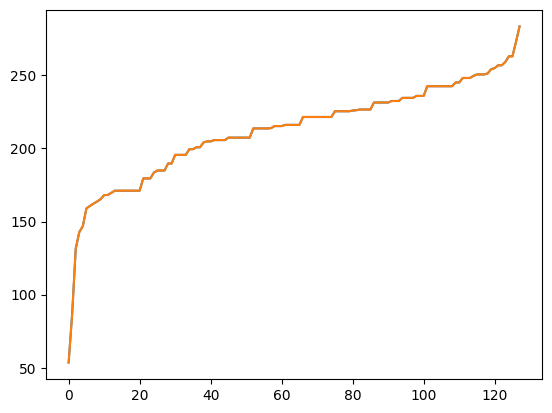

In [12]:
plt.plot(test_lags[test_lags.argsort()])
plt.plot(fitter_3.lags[fitter_3.lags.argsort()])
fitter_3.is_ready = True
fitter_3.fit(mock.lc_1, mock.lc_2)

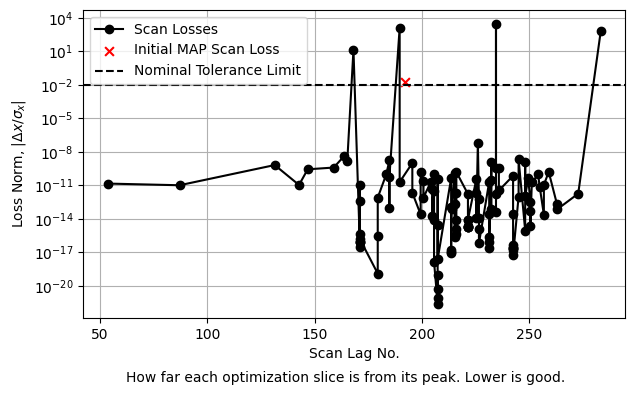

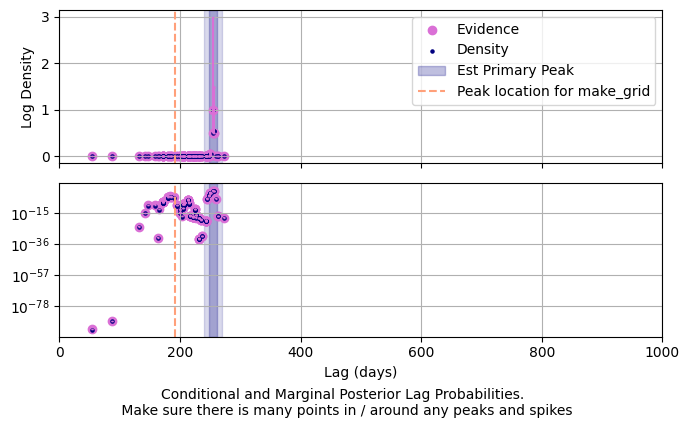

In [13]:
fitter_3.diagnostics(show=False)
fitter_3.diagnostic_lagplot(show=False)
plt.show()

Doing re-fitting of 4 lags 
:::::::::::::::::::::::
Refitting lag 0/4 at lag 168.13

Settled at new tol 1.45e-04 
:::::::::::::::::::::::
Refitting lag 1/4 at lag 189.65

Optimization failed on 1/4 
:::::::::::::::::::::::
Refitting lag 2/4 at lag 234.51

Settled at new tol 7.64e-04 
:::::::::::::::::::::::
Refitting lag 3/4 at lag 283.31

Settled at new tol 1.56e-04 
Refitting complete. 


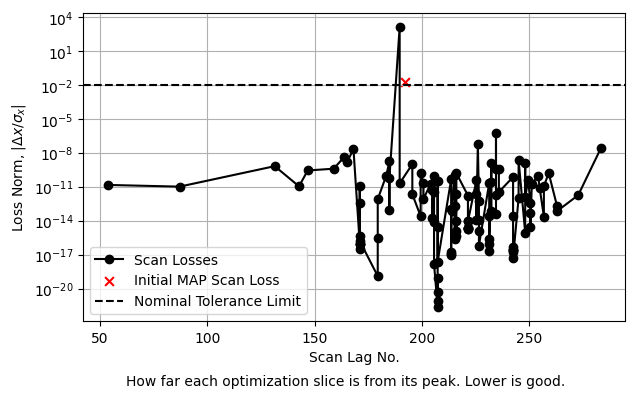

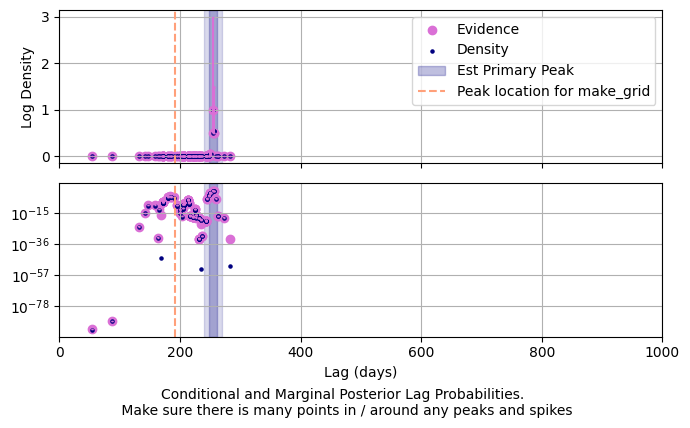

In [14]:
fitter_3.refit(mock.lc_1, mock.lc_2)
fitter_3.diagnostics(show=False)
fitter_3.diagnostic_lagplot(show=False)
plt.show()

In [ ]:
fitter.set_config(Nlags = 256)

In [28]:
lt = LITMUS(fitter_3)
lt.plot_parameters(truth=mock.params(), prior_extents=True, show=False)
plt.show()

KeyError: 'lag'